# EDA with titanic dataset

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

In [5]:
print(np.__version__)
print(pd.__version__)
print(matplotlib.__version__)
print(sns.__version__)

1.26.4
2.2.2
3.8.0
0.13.2


In [6]:
!wget https://raw.githubusercontent.com/devdio/datasets/refs/heads/main/kaggle/titanic/train.csv

--2024-12-24 01:43:17--  https://raw.githubusercontent.com/devdio/datasets/refs/heads/main/kaggle/titanic/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61194 (60K) [text/plain]
Saving to: ‘train.csv’

train.csv           100%[===================>]  59.76K  --.-KB/s    in 0.001s  

2024-12-24 01:43:17 (60.7 MB/s) - ‘train.csv’ saved [61194/61194]



In [10]:
df = pd.read_csv('train.csv')
df.shape

(891, 12)

In [11]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 데이터 전체 정보

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [14]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
df.describe(include='object').T

,count,unique,top,freq
Name,891,891,"Braund, Mr. Owen Harris",1
Sex,891,2,male,577
Ticket,891,681,347082,7
Cabin,204,147,B96 B98,4
Embarked,889,3,S,644


## 결측치(Missing Values)

In [17]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


<Axes: >

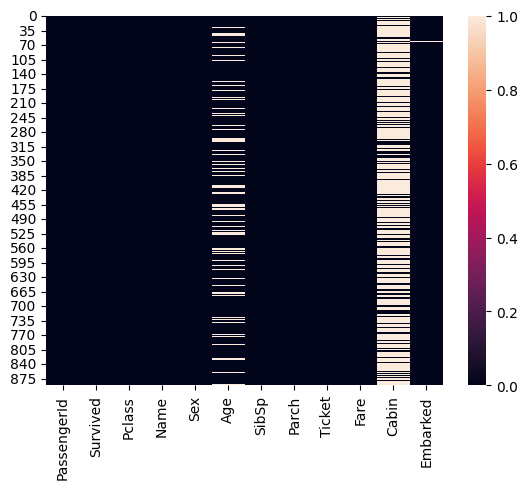

In [18]:
sns.heatmap(df.isna())

In [25]:
# embarked == 2인 데이터만 추출
df[df['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [26]:
df.loc[df['Embarked'].isna(), ['Sex', 'Age', 'Name']]

,Sex,Age,Name
61,female,38.0,"Icard, Miss. Amelie"
829,female,62.0,"Stone, Mrs. George Nelson (Martha Evelyn)"


## Survived

In [28]:
# 생존과 사망
df['Survived'].value_counts()

,count
Survived,
0,549
1,342


<Axes: xlabel='Survived', ylabel='count'>

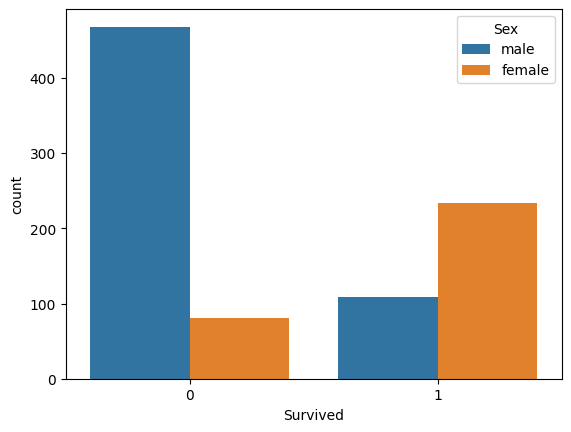

In [32]:
sns.countplot(data = df, x = 'Survived', hue = 'Sex')

In [33]:
df.groupby('Sex')['Survived'].value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: count, dtype: int64

## Sex 컬럼

In [34]:
df['Sex'].value_counts()

,count
Sex,
male,577
female,314


<Axes: xlabel='count', ylabel='Sex'>

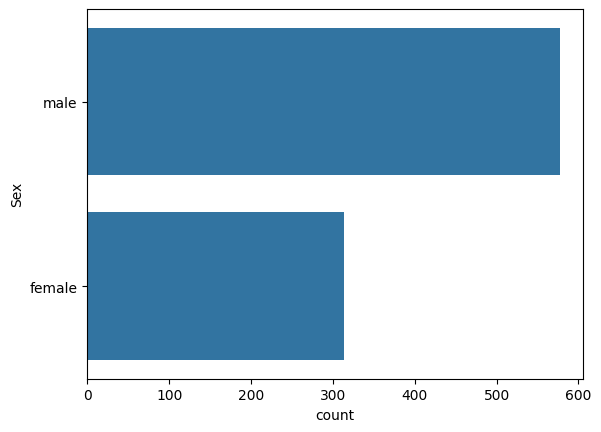

In [37]:
# countplot

sns.countplot(data = df['Sex'])

In [38]:
# 등급별 성별 탑승자수

df.groupby('Pclass')['Sex'].value_counts()

Pclass  Sex   
1       male      122
        female     94
2       male      108
        female     76
3       male      347
        female    144
Name: count, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

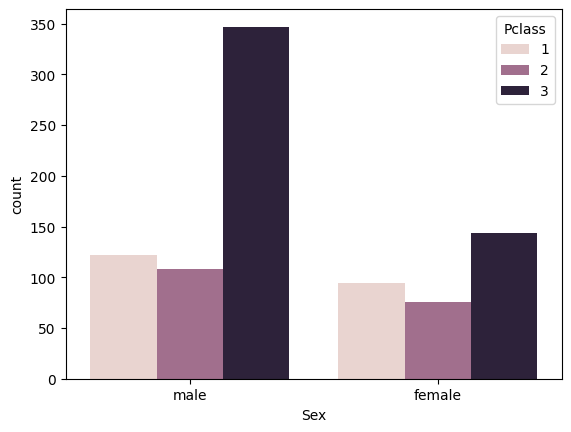

In [39]:
sns.countplot(data = df,
              x = 'Sex',
              hue = 'Pclass')

## Pclass 컬럼

In [41]:
df['Pclass'].value_counts()

,count
Pclass,
3,491
1,216
2,184


In [44]:
# 클래스 별 생존자 수
df.groupby('Pclass')['Survived'].value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: count, dtype: int64

<Axes: xlabel='Pclass', ylabel='count'>

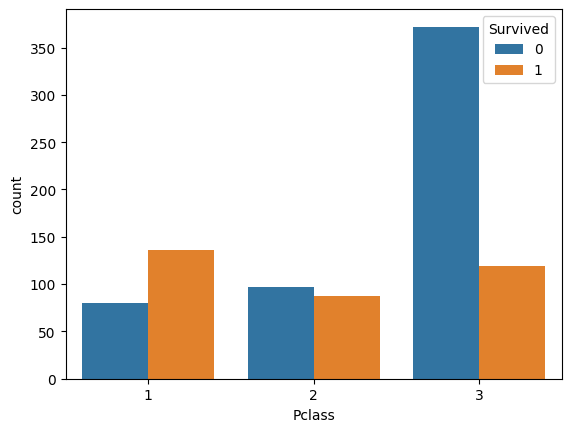

In [47]:
# 그래프
sns.countplot(data = df,
              x = 'Pclass',
              hue = 'Survived')

## Age

In [48]:
df['Age'].describe()

,Age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


<Axes: xlabel='Age', ylabel='Count'>

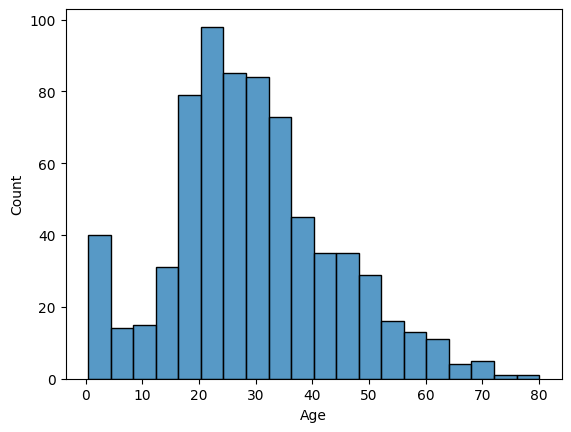

In [50]:
sns.histplot(data = df,
              x = 'Age')

<Axes: ylabel='Age'>

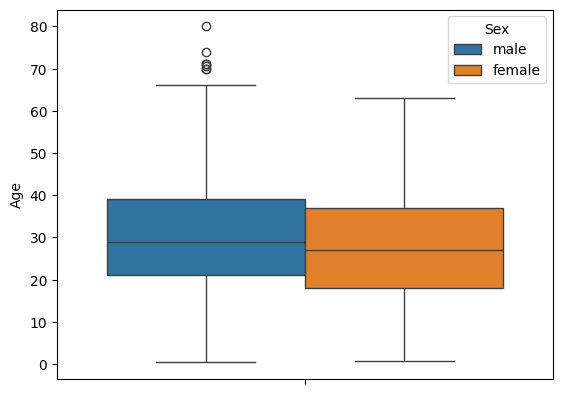

In [54]:
sns.boxplot(data = df, y = 'Age', hue = 'Sex')

<Axes: ylabel='Age'>

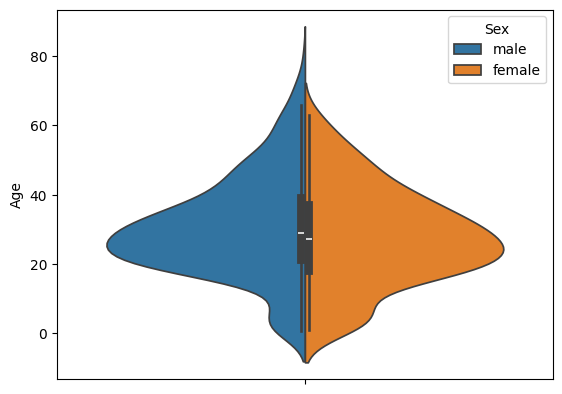

In [56]:
sns.violinplot(data = df, y = 'Age', hue = 'Sex', split = True)

In [ ]:
df.groupby(['Sex', 'Pclass'])['Survived'].va